# 1 Neural Networks
In the previous exercise, you implemented feedforward propagation for neu-
ral networks and used it to predict handwritten digits with the weights we
provided. In this exercise, you will implement the backpropagation algorithm
to learn the parameters for the neural network.

In [1]:
import numpy as np
import scipy.io as scio
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#Setup the parameters you will use for this exercise
input_layer_size=400
hidden_layer_size=25
num_labels=10

In [3]:
#Load Training Data
dataFile='ex4data1.mat'
data=scio.loadmat(dataFile)
X=data['X']
y=data['y']
m=X.shape[0]

## 1.1 Visualizing the data
randomly select 100 data points to display

In [4]:
#由于图片的存储问题，需要先将X的方向做一下处理，否则图片的方向是错的
def transpose_X(X):
    #将X的每一行(400,1)都变成20×20的然后转置
    X = np.array([im.reshape((20, 20)).T for im in X])
    #再将X的每一行变回来，这样图片方向就正确了
    X = np.array([im.reshape(400) for im in X])
    return X
X=transpose_X(X)

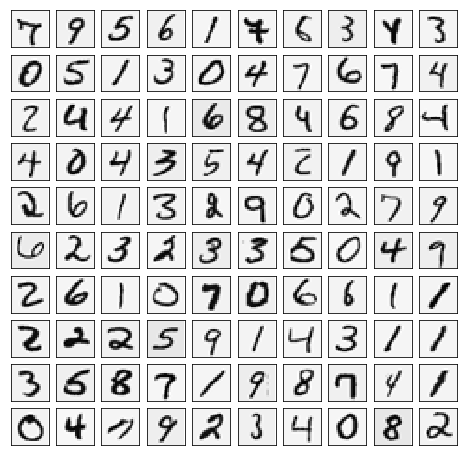

In [5]:
#显示100张图片
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
plot_100_image(X)
plt.show()

In [6]:
X=transpose_X(X)#为了后面的数据测试，需要再把X变回原来的方向

## 1.2 Model representation
Our neural network has 3 layers – an input layer,
a hidden layer and an output layer. Recall that our inputs are pixel values
3of digit images. Since the images are of size 20 × 20, this gives us 400 input
layer units (not counting the extra bias unit which always outputs +1).

You have been provided with a set of network parameters (Θ (1) , Θ (2) )
already trained by us. These are stored in ex4weights.mat and will be
loaded by ex4.m into Theta1 and Theta2. The parameters have dimensions
that are sized for a neural network with 25 units in the second layer and 10
output units (corresponding to the 10 digit classes).

In [7]:
#Load the weights into variables Theta1 and Theta2
dataFile='ex4weights.mat'
data=scio.loadmat(dataFile)
Theta1=data['Theta1']
Theta2=data['Theta2']
#Unroll parameters
nn_params=np.hstack((Theta1.ravel(),Theta2.ravel()))

## 1.3 Feedforward and cost function
Now you will implement the cost function and gradient for the neural net-
work. First, complete the code in nnCostFunction.m to return the cost.
4Recall that the cost function for the neural network (without regulariza-
tion) is
$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y_{k}^{(i)}log((h_{\theta}(x^{(i)}))_{k})-(1-y_{k}^{i})log(1-(h_{\theta}(x^{(i)}))_{k})]$$
where h θ (x (i) ) is computed as shown in the Figure 2 and K = 10 is the total
(3)
number of possible labels. Note that h θ (x (i) ) k = a k is the activation (output
value) of the k-th output unit. Also, recall that whereas the original labels
(in the variable y) were 1, 2, ..., 10, for the purpose of training a neural
network, we need to recode the labels as vectors containing only values 0 or
1, so that
$$y=\begin{bmatrix}1\\0 \\ 0\\ \vdots \\ 0\end{bmatrix},\begin{bmatrix}0\\1 \\ 0\\ \vdots \\ 0\end{bmatrix},\cdots or\begin{bmatrix}0\\ 0\\ 0\\\vdots\\1 \end{bmatrix}$$
For example, if x (i) is an image of the digit 5, then the corresponding
y (i) (that you should use with the cost function) should be a 10-dimensional
vector with y 5 = 1, and the other elements equal to 0.
You should implement the feedforward computation that computes h θ (x (i) )
for every example i and sum the cost over all examples. Your code should
also work for a dataset of any size, with any number of labels (you
can assume that there are always at least K ≥ 3 labels).

Implementation Note: The matrix X contains the examples in rows
(i.e., X(i,:)’ is the i-th training example x (i) , expressed as a n × 1
vector.) When you complete the code in nnCostFunction.m, you will
need to add the column of 1’s to the X matrix. The parameters for each
unit in the neural network is represented in Theta1 and Theta2 as one
row. Specifically, the first row of Theta1 corresponds to the first hidden
unit in the second layer. You can use a for-loop over the examples to
compute the cost.

Once you are done, ex4.m will call your nnCostFunction using the loaded
set of parameters for Theta1 and Theta2. You should see that the cost is
about 0.287629.

In [8]:
#define some useful function firstly
def sigmoid(z):
    res=1/(1+np.exp(-z))
    return res
def h(x):
    res=sigmoid(x)
    return res

In [9]:
#================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.


def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,\
                  num_labels,X,y,lambd):
    # NNCOSTFUNCTION Implements the neural network cost function for a 
    # two layer neural network which performs classification
    # [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels,
    # X, y, lambda) computes the cost and gradient of the neural network. 
    # The parameters for the neural network are "unrolled" into the vector
    # nn_params and need to be converted back into the weight matrices. 
    
    # The returned parameter grad should be a "unrolled" vector of the
    # partial derivatives of the neural network.



    # Reshape nn_params back into the parameters Theta1 and Theta2, 
    # the weight matrices
    # for our 2 layer neural network
    Theta1,Theta2=np.hsplit(nn_params,((input_layer_size+1)*\
                                       hidden_layer_size,))
    Theta1=Theta1.reshape((hidden_layer_size,(input_layer_size+1)))
    Theta2=Theta2.reshape((num_labels,(hidden_layer_size+1)))
    
    # Setup some useful variables
    m=X.shape[0]
    
    #change y(i) to vector
    y_new=np.zeros((m,num_labels))
    for i in range(m):
        for j in range(1,num_labels+1):
            if y[i][0]==j:y_new[i][j-1]=1
    y=y_new
    
    # You need to return the following variables correctly
    J=0
    Theta1_grad=np.zeros(Theta1.shape)
    Theta2_grad=np.zeros(Theta2.shape)
    
#Part 1: Feedforward the neural network and return the cost in the 
#variable J. 
    #add a column of 1 to X
    X=np.hstack((np.ones((m,1)),X))
    hidden=h(np.dot(X,Theta1.T)) #compute the hidden layer
    hidden=np.hstack((np.ones((m,1)),hidden))
    output=h(np.dot(hidden,Theta2.T))
    #choose the theta with penalize
    Theta1_penalize=np.hsplit(Theta1,(1,))[1]
    Theta2_penalize=np.hsplit(Theta2,(1,))[1]
    J=np.sum(-y*np.log(output)-(1-y)*np.log(1-output))/m+\
    (lambd/(2*m))*(np.sum(Theta1_penalize**2)+np.sum(Theta2_penalize**2))

#Part 2: Implement the backpropagation algorithm to compute the gradients
# Theta1_grad and Theta2_grad. You should return the partial derivatives of
# the cost function with respect to Theta1 and Theta2 in Theta1_grad and
# Theta2_grad, respectively. After implementing Part 2, you can check
# that your implementation is correct by running checkNNGradients

# Note: The vector y passed into the function is a vector of labels
#       containing values from 1..K. You need to map this vector into a 
#       binary vector of 1's and 0's to be used with the neural network
#       cost function.

# Hint: We recommend implementing backpropagation using a for-loop
#       over the training examples if you are implementing it for the 
#       first time.
    #set Delta2 and Delta3
    Delta2=np.zeros(Theta2.shape)
    Delta1=np.zeros(Theta1.shape)
    for i in range(m):
        #set a(1)=x(i)
        a1=X[i,:].reshape((input_layer_size+1,1))
        #perform foward propagation to compute a(l) for l=1,2,3.....L
        a2=h(np.dot(Theta1,a1))
        a2=np.vstack((np.ones((1,1)),a2))
        a3=h(np.dot(Theta2,a2))
        #Using delta(L)=a(L)-y(i)
        delta3=a3-y[i].reshape((num_labels,1))
        #perform back propagation to compute all previous layer error vector
        delta2=np.dot(Theta2.T,delta3)*a2*(1-a2)
        delta2=np.vsplit(delta2,(1,))[1] #需要把bias unit(delta2_0)丢弃
        Delta1=Delta1+np.dot(delta2,a1.T)
        Delta2=Delta2+np.dot(delta3,a2.T)
    #computer the derivative matrix D2 and D1
    Theta2_grad=Delta2/m+(lambd/m)*Theta2
    Theta2_grad[:,0]-=(lambd/m)*Theta2[:,0]
    Theta1_grad=Delta1/m+(lambd/m)*Theta1
    Theta1_grad[:,0]-=(lambd/m)*Theta1[:,0]
    #Unroll gradients
    grad=np.hstack((Theta1_grad.ravel(),Theta2_grad.ravel()))
    return J,grad
        



In [10]:
#test my nnCostFunction
# Weight regularization parameter (we set this to 0 here).
lambd=0
J,grad=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,\
                      num_labels,X,y,lambd)
print('Cost at parameters(loaded from ex4weights):')
print('This value should be about 0.287629')
print('My value is',J)

Cost at parameters(loaded from ex4weights):
This value should be about 0.287629
My value is 0.287629165161


In [11]:
# =============== Part 4: Implement Regularization ===============
# Once your cost function implementation is correct, you should now
# continue to implement the regularization with the cost.

# Weight regularization parameter (we set this to 1 here)
lambd=1
J,grad=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,\
                      num_labels,X,y,lambd)
print('Cost at parameters(loaded from ex4weights):')
print('This value should be about 0.383770')
print('My value is',J)

Cost at parameters(loaded from ex4weights):
This value should be about 0.383770
My value is 0.383769859091


# 2. Backprpagation
In this part of the exercise, you will implement the backpropagation algo-
rithm to compute the gradient for the neural network cost function. You
will need to complete the nnCostFunction.m so that it returns an appropri-
ate value for grad. Once you have computed the gradient, you will be able
to train the neural network by minimizing the cost function J(Θ) using an
advanced optimizer such as fmincg.
You will first implement the backpropagation algorithm to compute the
gradients for the parameters for the (unregularized) neural network. After you have verified that your gradient computation for the unregularized case
is correct, you will implement the gradient for the regularized neural network.

## 2.1 Sigmoid gradient
To help you get started with this part of the exercise, you will first implement
the sigmoid gradient function. The gradient for the sigmoid function can be
computed as
$${g}'(z)=\frac{d}{dz}g(z)=g(z)(1-g(z))$$
where
$$sigmoid(z)=g(z)=\frac{1}{1+e^{-z}}$$
When you are done, try testing a few values by calling sigmoidGradient(z)
at the Octave/MATLAB command line. For large values (both positive and
negative) of z, the gradient should be close to 0. When z = 0, the gradi-
ent should be exactly 0.25. Your code should also work with vectors and
matrices. For a matrix, your function should perform the sigmoid gradient
function on every element.

In [12]:
# ================ Part 5: Sigmoid Gradient  ================
# Before you start implementing the neural network, you will first
# implement the gradient for the sigmoid function.
def sigmoidGradient(z):
    #returns the gradient of the sigmoid function
    g=sigmoid(z)*(1-sigmoid(z))
    return g
#test sigmoidGradient function
g=sigmoidGradient(np.array([-1,0.5,0,0.5,1]))
print(g)
print('My sigmoidGradient function when z=0:',sigmoidGradient(0),'it\
should be 0.25')

[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]
My sigmoidGradient function when z=0: 0.25 itshould be 0.25


## 2.2 Random initialization
When training neural networks, it is important to randomly initialize the pa-
rameters for symmetry breaking. One effective strategy for random initializa-
tion is to randomly select values for Θ (l) uniformly in the range [− init ,  init ].
You should use  init = 0.12. 2 This range of values ensures that the parameters
are kept small and makes the learning more efficient.
Your job is to complete randInitializeWeights.m to initialize the weights
for Θ

In [13]:
# ================ Part 6: Initializing Pameters ================
# In this part of the exercise, you will be starting to implment a two
# layer neural network that classifies digits. You will start by
# implementing a function to initialize the weights of the neural network
# (randInitializeWeights.m)
def randInitializeWeights(L_in,L_out):
    epsilon_init=0.12
    W=np.random.random((L_out,1+L_in))*2*epsilon_init-epsilon_init
    return W
#initialize 
initial_Theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
initial_Theta2=randInitializeWeights(hidden_layer_size,num_labels)
# Unroll parameters
initial_nn_params=np.hstack((initial_Theta1.ravel(),initial_Theta2.ravel()))

## 2.3 Backpropagation
Now, you will implement the backpropagation algorithm. Recall that
the intuition behind the backpropagation algorithm is as follows. Given a
training example (x (t) , y (t) ), we will first run a “forward pass” to compute
all the activations throughout the network, including the output value of the
hypothesis h Θ (x). Then, for each node j in layer l, we would like to compute
(l)
an “error term” δ j that measures how much that node was “responsible”
for any errors in our output.

For an output node, we can directly measure the difference between the
(3)
network’s activation and the true target value, and use that to define δ j
(since layer 3 is the output layer). For the hidden units, you will compute
(l)
δ j based on a weighted average of the error terms of the nodes in layer
(l + 1).

In detail, here is the backpropagation algorithm (also depicted in Figure
3). You should implement steps 1 to 4 in a loop that processes one example
at a time. Concretely, you should implement a for-loop for t = 1:m and
place steps 1-4 below inside the for-loop, with the t th iteration performing
the calculation on the t th training example (x (t) , y (t) ). Step 5 will divide the
accumulated gradients by m to obtain the gradients for the neural network
cost function.

1.Set the input layer’s values (a (1) ) to the t-th training example x (t) .
Perform a feedforward pass (Figure 2), computing the activations (z (2) , a (2) , z (3) , a (3) )
for layers 2 and 3. Note that you need to add a +1 term to ensure that
the vectors of activations for layers a (1) and a (2) also include the bias
unit. In Octave/MATLAB, if a 1 is a column vector, adding one corre-
sponds to a 1 = [1 ; a 1].

2.For each output unit k in layer 3 (the output layer), set
$$\delta _{k}^{(3)}=(a_{k}^{(3)}-y_{k})$$
where y k ∈ {0, 1} indicates whether the current training example be-
longs to class k (y k = 1), or if it belongs to a different class (y k = 0).
You may find logical arrays helpful for this task (explained in the pre-
vious programming exercise).

3.For the hidden layer l = 2, set
$$\delta ^{(2)}=(\Theta ^{(2)})^{T}\delta^{3}.*{g}'(z^{(2)})$$

4.Accumulate the gradient from this example using the following formula. Note that you should skip or remove $\delta_{0}^{(2)}$.
$$\Delta^{(l)}=\Delta^{(l)}+\delta^{(l+1)}(a^{(l)})^{T}$$

5.Obtain the (unregularized) gradient for the neural network cost func-
tion by dividing the accumulated gradients by $\frac{1}{m}$ :
$$\frac{\partial }{\partial \Theta _{ij}^{(l)}}J(\Theta)=D_{ij}^{(l)}=\frac{1}{m}\Delta_{ij}^{(l)}$$

## 2.4 Gradient checking

In [14]:
# =============== Part 7: Implement Backpropagation ===============
# Once your cost matches up with ours, you should proceed to implement the
# backpropagation algorithm for the neural network. You should add to the
# code you've written in nnCostFunction.m to return the partial
# derivatives of the parameters.

def computeNumericalGradient1(theta,input_layer_size,hidden_layer_size,\
                            num_labels,X,y,lambd):
    numgrad=np.zeros(theta.shape)
    print(theta.shape)
    e=10**(-4)
    for i in range(theta.shape[0]):
        #set perturbation vector
        thetaPlus=theta
        thetaPlus[i]=thetaPlus[i]+e
        thetaMinus=theta
        thetaMinus[i]=thetaMinus[i]-e
        numgrad[i]=(nnCostFunction(thetaPlus,input_layer_size,\
                                  hidden_layer_size,num_labels,X,y,lambd)[0]\
                   -nnCostFunction(thetaMinus,input_layer_size,\
                                  hidden_layer_size,num_labels,X,y,lambd)[0])\
        /(2*e)
        return numgrad
def computeNumericalGradient(theta,input_layer_size,hidden_layer_size,\
                            num_labels,X,y,lambd):
    numgrad=np.zeros(theta.shape)
    perturb=np.zeros(theta.shape)
    e=10**(-4)
    for i in range(theta.shape[0]):
        perturb[i]=e
        loss1=nnCostFunction(theta-perturb,input_layer_size,\
                                  hidden_layer_size,num_labels,X,y,lambd)[0]
        loss2=nnCostFunction(theta+perturb,input_layer_size,\
                                  hidden_layer_size,num_labels,X,y,lambd)[0]
        numgrad[i]=(loss2-loss1)/(2*e)
        perturb[i]=0
    return numgrad

def checkNNGradients(lambd):
    #CHECKNNGRADIENTS Creates a small neural network to check the
    #backpropagation gradients
    #CHECKNNGRADIENTS(lambda) Creates a small neural network to check the
    #backpropagation gradients, it will output the analytical gradients
    #produced by your backprop code and the numerical gradients (computed
    #using computeNumericalGradient). These two gradient computations should
    #result in very similar values.
    input_layer_size=3
    hidden_layer_size=5
    num_labels=3
    m=5
    #we generate some 'random' test data
    Theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
    Theta2=randInitializeWeights(hidden_layer_size,num_labels)
    X=randInitializeWeights(input_layer_size-1,m)
    y=np.array([[2],[3],[1],[2],[3]])
    
    #Unroll parameters
    nn_params=np.hstack((Theta1.ravel(),Theta2.ravel()))
    
    cost,grad=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,\
                            num_labels,X,y,lambd)
    numgrad=computeNumericalGradient(nn_params,input_layer_size,\
                                     hidden_layer_size,num_labels,X,y,lambd)
    #np.linalg.norm计算矩阵的二范数
    diff=np.linalg.norm(numgrad-grad,ord=2)/np.linalg.norm(numgrad+grad,ord=2)
    print(grad)
    print(numgrad)
    print('If your backpropagation implementation is correct,then the relavive\
    difference will be small(less than 1e-9)')
    print('Relative Difference:',diff)

# Check gradients by running checkNNGradients
lambd=0
checkNNGradients(lambd)
lambd=3
checkNNGradients(lambd)
debug_J=nnCostFunction(nn_params, input_layer_size,hidden_layer_size, num_labels, X, y, lambd)[0]
print('Cost at (fixed) debugging parameters with lambda=3 should be about\
0.576051.My value is',debug_J)

[ -3.25792022e-03   6.95267001e-05   2.26836175e-04  -1.91199145e-04
   7.28803655e-03   2.63010675e-04  -9.27868859e-04  -2.31091249e-04
  -7.74066555e-03  -2.63261762e-04   3.22630890e-04   2.20469277e-05
   8.40487717e-03   3.12541991e-04  -9.91227381e-04  -2.53914828e-04
  -4.99734603e-03  -3.16344430e-04   5.41074682e-04   3.01535743e-04
   2.84813444e-01   1.41750491e-01   1.37748715e-01   1.48878623e-01
   1.45455868e-01   1.43578953e-01   7.49697174e-02   3.74636733e-02
   3.66274193e-02   3.89509605e-02   3.84507535e-02   3.80110496e-02
   6.15062604e-02   3.09748332e-02   2.94907258e-02   3.22534181e-02
   3.16908382e-02   3.12355399e-02]
[ -3.25792022e-03   6.95267022e-05   2.26836177e-04  -1.91199143e-04
   7.28803654e-03   2.63010675e-04  -9.27868862e-04  -2.31091246e-04
  -7.74066554e-03  -2.63261764e-04   3.22630891e-04   2.20469265e-05
   8.40487716e-03   3.12541992e-04  -9.91227382e-04  -2.53914829e-04
  -4.99734603e-03  -3.16344431e-04   5.41074683e-04   3.01535743e-0

## 2.5 Regularized Neural Networks

## 2.6 Learning parameters using minimize

In [15]:
# =================== Part 8: Training NN ===================
# You have now implemented all the code necessary to train a neural 
# network. To train your neural network, I will use "minimize"
lambd=0
optimizeResult=minimize(fun=nnCostFunction,x0=initial_nn_params,jac=True,method='TNC',\
                       args=(input_layer_size,hidden_layer_size,num_labels,X,y,lambd),\
                       options={'maxiter':400})
print(optimizeResult)

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in multiply


     fun: 0.0098700142596729427
     jac: array([ -1.65714045e-03,   0.00000000e+00,   0.00000000e+00, ...,
        -2.47345985e-05,   1.11322923e-05,  -7.89270400e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 302
     nit: 24
  status: 1
 success: True
       x: array([ -0.24916562,   0.0650514 ,   0.08328351, ...,   1.92554164,
       -11.42503989,  -2.07229639])


In [16]:
def feedpropagation(theta,X):
    m=X.shape[0]
    X=np.hstack((np.ones((X.shape[0],1)),X))
    Theta1,Theta2=np.hsplit(theta,(401*25,))
    Theta1=Theta1.reshape(25,401)
    Theta2=Theta2.reshape(10,26)
    A2=h(np.dot(X,Theta1.T))
    A2=np.hstack((np.ones((m,1)),A2))
    A3=h(np.dot(A2,Theta2.T))
    return A3
def computeAccuracy(y,A3):
    m=A3.shape[0]
    y_predict=np.zeros((m,))
    for i in range(m):
        y_predict[i]=np.argmax(A3[i])+1
    num=0
    for i in range(m):
        if y[i][0]==y_predict[i]:num+=1
    accuracy=num/m
    return str(accuracy*100)+'%'
A3=feedpropagation(optimizeResult.x,X)
accuracy=computeAccuracy(y,A3)
print(accuracy)

99.98%


In [17]:
lambd=3
optimizeResult=minimize(fun=nnCostFunction,x0=initial_nn_params,jac=True,method='TNC',\
                       args=(input_layer_size,hidden_layer_size,num_labels,X,y,lambd),\
                       options={'maxiter':400})
print(optimizeResult)

     fun: 0.56271357167800151
     jac: array([  9.15127345e-05,  -2.32582327e-08,  -2.19592963e-08, ...,
         2.03382748e-05,   2.91558932e-05,   1.24538794e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 25
  status: 3
 success: False
       x: array([ -4.07005706e-01,  -3.87637212e-05,  -3.65988272e-05, ...,
        -4.18475003e-01,  -1.82029599e+00,   7.51262514e-01])


In [18]:
A3=feedpropagation(optimizeResult.x,X)
accuracy=computeAccuracy(y,A3)
print(accuracy)

97.64%


In [19]:
lambd=1
optimizeResult=minimize(fun=nnCostFunction,x0=initial_nn_params,jac=True,method='TNC',\
                       args=(input_layer_size,hidden_layer_size,num_labels,X,y,lambd),\
                       options={'maxiter':400})
print(optimizeResult)

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in multiply


     fun: 0.34679708722520669
     jac: array([ -1.17421849e-03,   3.32481094e-06,   4.03150121e-06, ...,
        -2.17687521e-06,  -6.73221598e-05,  -1.63890166e-04])
 message: 'Linear search failed'
    nfev: 281
     nit: 18
  status: 4
 success: False
       x: array([ 0.9853918 ,  0.01662405,  0.02015751, ...,  1.24954123,
       -3.99704944, -0.98578513])


In [20]:
A3=feedpropagation(optimizeResult.x,X)
accuracy=computeAccuracy(y,A3)
print(accuracy)

99.02%


# 3. Visualizing the hidden layer

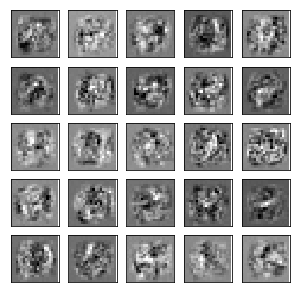

In [21]:
final_theta=optimizeResult.x
def plt_hidden_layer(theta):
    Theta1=np.hsplit(theta,(401*25,))[0]
    Theta1=Theta1.reshape(25,401)
    hidden_layer=Theta1[:,1:]
    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(5, 5))

    for r in range(5):
        for c in range(5):
            ax_array[r, c].matshow(hidden_layer[5 * r + c].reshape((20, 20)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
plt_hidden_layer(final_theta)
plt.show()